# Import thư viện quan trọng và gán df vào biến

In [640]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('developer_dataset.csv')
print(df.head())

   RespondentID  Year             Country  \
0             1  2018  Employed full-time   
1             2  2020       United States   
2             3  2018       United States   
3             3  2019       United States   
4             3  2020       United States   

                                          Employment  \
0  Computer science, computer engineering, or sof...   
1                                 Employed full-time   
2                                 Employed full-time   
3                                 Employed full-time   
4                                 Employed full-time   

                                      UndergradMajor  \
0  Data or business analyst;Database administrato...   
1  Computer science, computer engineering, or sof...   
2  Computer science, computer engineering, or sof...   
3                                                NaN   
4  Computer science, computer engineering, or sof...   

                                             DevType  \

/var/folders/tb/2gs11dr53_g_1c68gymq2dg00000gn/T/ipykernel_3687/2074890453.py:7: DtypeWarning: Columns (14,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


# Explore data
- Columns of it
- Rows of each column
- Summary statistics

In [641]:
df.columns

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')

In [642]:
df.count()

RespondentID              111205
Year                      111205
Country                   111205
Employment                109421
UndergradMajor             98449
DevType                   100430
LanguageWorkedWith        102015
LanguageDesireNextYear     96041
DatabaseWorkedWith         85856
DatabaseDesireNextYear     74231
PlatformWorkedWith         91606
PlatformDesireNextYear     85373
Hobbyist                   68350
OrgSize                    54803
YearsCodePro               94790
JobSeek                    60555
ConvertedComp              91330
WorkWeekHrs                51087
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24225
dtype: int64

In [643]:
df.describe()

,RespondentID,Year,ConvertedComp,WorkWeekHrs
count,111205.000000,111205.000000,9.133000e+04,51087.000000
mean,19262.732503,2018.854827,1.251780e+05,41.050929
std,11766.655929,0.777505,2.461259e+05,13.833126
min,1.000000,2018.000000,0.000000e+00,1.000000
25%,9269.000000,2018.000000,4.600000e+04,40.000000
50%,18536.000000,2019.000000,7.900000e+04,40.000000
75%,28348.000000,2019.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,2.000000e+06,475.000000


In [644]:
missing_data_sum = df.isnull().sum().sort_values(ascending=False)
missing_data_sum

NEWJobHuntResearch        92522
NEWJobHunt                92078
NEWLearn                  86980
WorkWeekHrs               60118
OrgSize                   56402
JobSeek                   50650
Hobbyist                  42855
DatabaseDesireNextYear    36974
PlatformDesireNextYear    25832
DatabaseWorkedWith        25349
ConvertedComp             19875
PlatformWorkedWith        19599
YearsCodePro              16415
LanguageDesireNextYear    15164
UndergradMajor            12756
DevType                   10775
LanguageWorkedWith         9190
Employment                 1784
Year                          0
Country                       0
RespondentID                  0
dtype: int64

# Columns with null variable abv 60%

In [645]:
maxRows = df['RespondentID'].count()
high_null_columns = (1-df.count()/maxRows)*100
high_null_columns.sort_values(ascending=False)

# so we have to dlt these columns
# NEWJobHuntResearch        83.200101
# NEWJobHunt                82.800852
# NEWLearn                  78.215792

NEWJobHuntResearch        83.199496
NEWJobHunt                82.800234
NEWLearn                  78.215908
WorkWeekHrs               54.060519
OrgSize                   50.718942
JobSeek                   45.546513
Hobbyist                  38.536936
DatabaseDesireNextYear    33.248505
PlatformDesireNextYear    23.229171
DatabaseWorkedWith        22.794838
ConvertedComp             17.872398
PlatformWorkedWith        17.624208
YearsCodePro              14.761027
LanguageDesireNextYear    13.636078
UndergradMajor            11.470707
DevType                    9.689313
LanguageWorkedWith         8.264017
Employment                 1.604244
Year                       0.000000
Country                    0.000000
RespondentID               0.000000
dtype: float64

# Drop highest percent columns

In [646]:
df.drop(['NEWJobHuntResearch', 'NEWJobHunt', 'NEWLearn'], axis=1, inplace=True)
print(df.columns) 

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs'],
      dtype='object')


## Explore missing data of employment in each country

## Original Data

In [647]:
df[['RespondentID','Country']].groupby('Country').count().reset_index()

,Country,RespondentID
0,Canada,8979
1,China,2072
2,Employed full-time,1
3,France,6861
4,Germany,16215
5,Japan,1049
6,Mexico,1918
7,Spain,4534
8,United Kingdom,15854
9,United States,53722


## Only missing data

In [648]:
missingd_employ_devtype = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()
print(missingd_employ_devtype)

              Country  Employment  DevType
0              Canada         148      944
1               China         139      491
2  Employed full-time           0        0
3              France         104      848
4             Germany         386     1691
5               Japan          13      109
6              Mexico          25      207
7               Spain          74      434
8      United Kingdom         196     1472
9       United States         699     4579


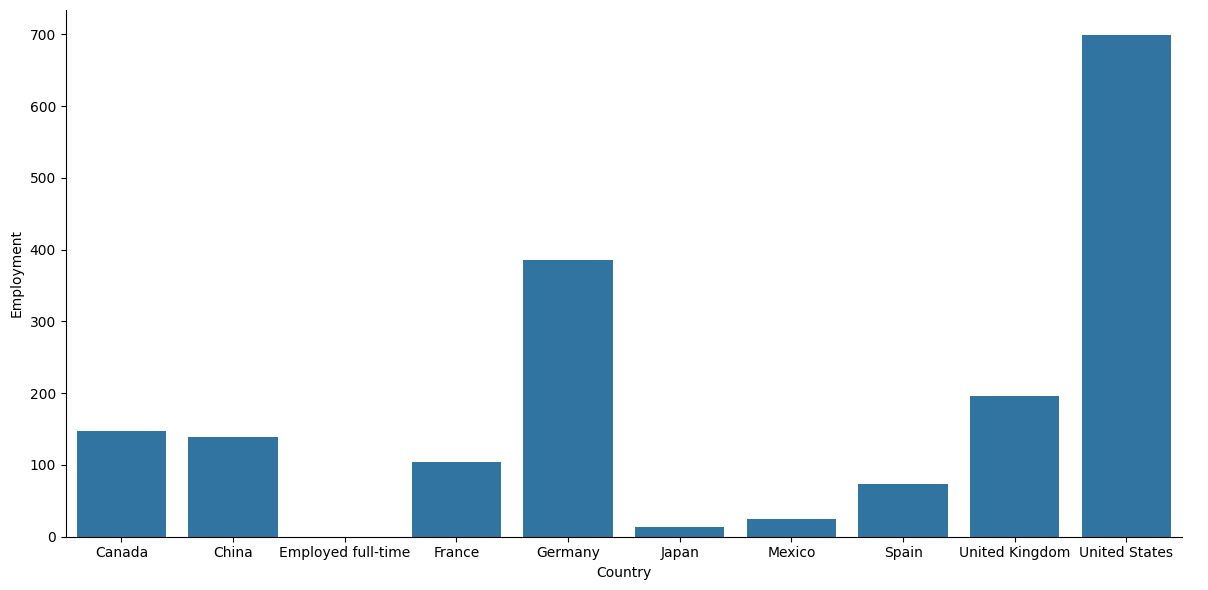

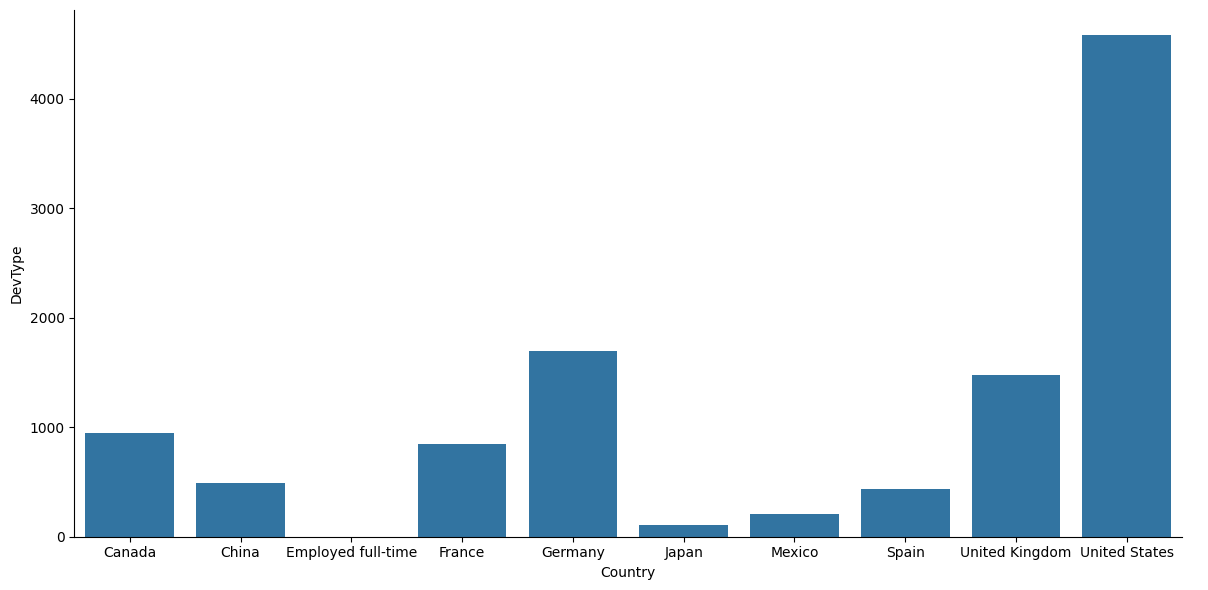

In [649]:
A = sns.catplot(x='Country', y='Employment', kind='bar', data=missingd_employ_devtype, height=6, aspect=2)
B = sns.catplot(x='Country', y='DevType', kind='bar', data=missingd_employ_devtype, height=6, aspect=2)

# Vẽ bar chart theo từng mục tương ứng với câu trả lời.

## Employment + Country

/var/folders/tb/2gs11dr53_g_1c68gymq2dg00000gn/T/ipykernel_3687/2915517172.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Country',


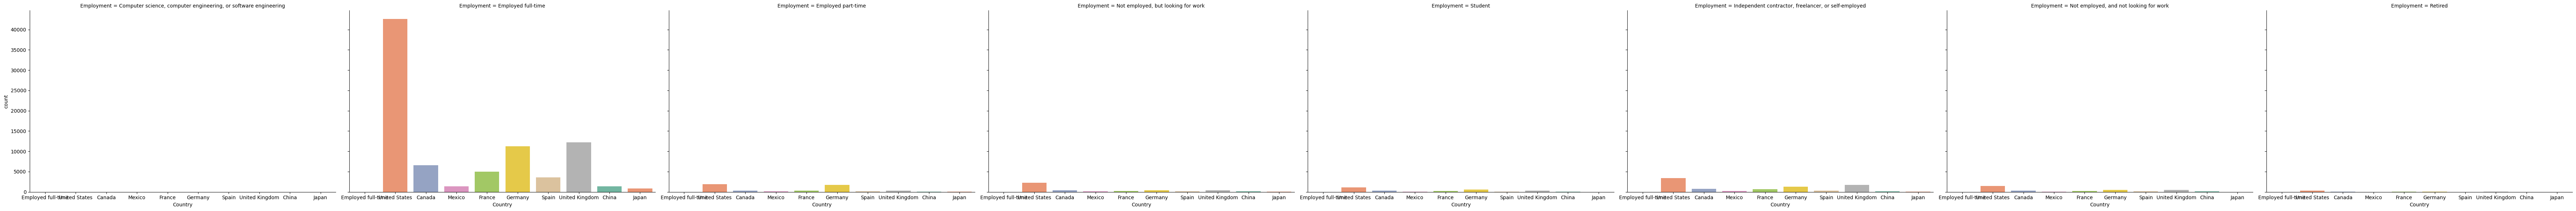

In [650]:
sns.catplot(x='Country',
            col='Employment',
            data=df,
            kind='count',
            height=6,
            aspect=1.5,
            palette='Set2')

## Vẽ catplot cho country vs Devtype

- Front-end
- Back-end
- Full-stack
- Mobile development
- Administration roles

In [651]:
df.dropna(subset = ['Employment','DevType'], inplace = True, how = 'any')


In [652]:
# df.loc[df['A'] > 3, 'New_Column'] = True
devDf = df[['Country', 'DevType']]
devDf['DevType'] = devDf['DevType'].str.lower()

devDf.loc[devDf['DevType'].str.contains('back-end', na=False), 'Back-end'] = True
devDf.loc[devDf['DevType'].str.contains('front-end', na=False), 'Front-end'] = True
devDf.loc[devDf['DevType'].str.contains('full-stack', na=False), 'Full-stack'] = True
devDf.loc[devDf['DevType'].str.contains('mobile', na=False), 'Mobile development'] = True
devDf.loc[devDf['DevType'].str.contains('administrator', na=False), 'Administration roles'] = True\

# print(devDf.head(10))

/var/folders/tb/2gs11dr53_g_1c68gymq2dg00000gn/T/ipykernel_3687/3381868168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devDf['DevType'] = devDf['DevType'].str.lower()
/var/folders/tb/2gs11dr53_g_1c68gymq2dg00000gn/T/ipykernel_3687/3381868168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devDf.loc[devDf['DevType'].str.contains('back-end', na=False), 'Back-end'] = True
/var/folders/tb/2gs11dr53_g_1c68gymq2dg00000gn/T/ipykernel_3687/3381868168.py:6: SettingWithCopyWarning: 
A value is trying to b

In [653]:
# Use melt to reshape the DataFrame
devDf = pd.melt(devDf,
                id_vars=['Country', 'DevType'], 
                value_vars=['Back-end', 'Front-end', 'Full-stack', 'Mobile development', 'Administration roles'],
                var_name='Role', 
                value_name='DevFlag')

# Filter only rows where 'DevFlag' is True
devDf.dropna(how='any', inplace=True)
devDf.drop('DevType', axis=1, inplace=True)
# print(devDf.head(100))

/var/folders/tb/2gs11dr53_g_1c68gymq2dg00000gn/T/ipykernel_3687/755664377.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Country',


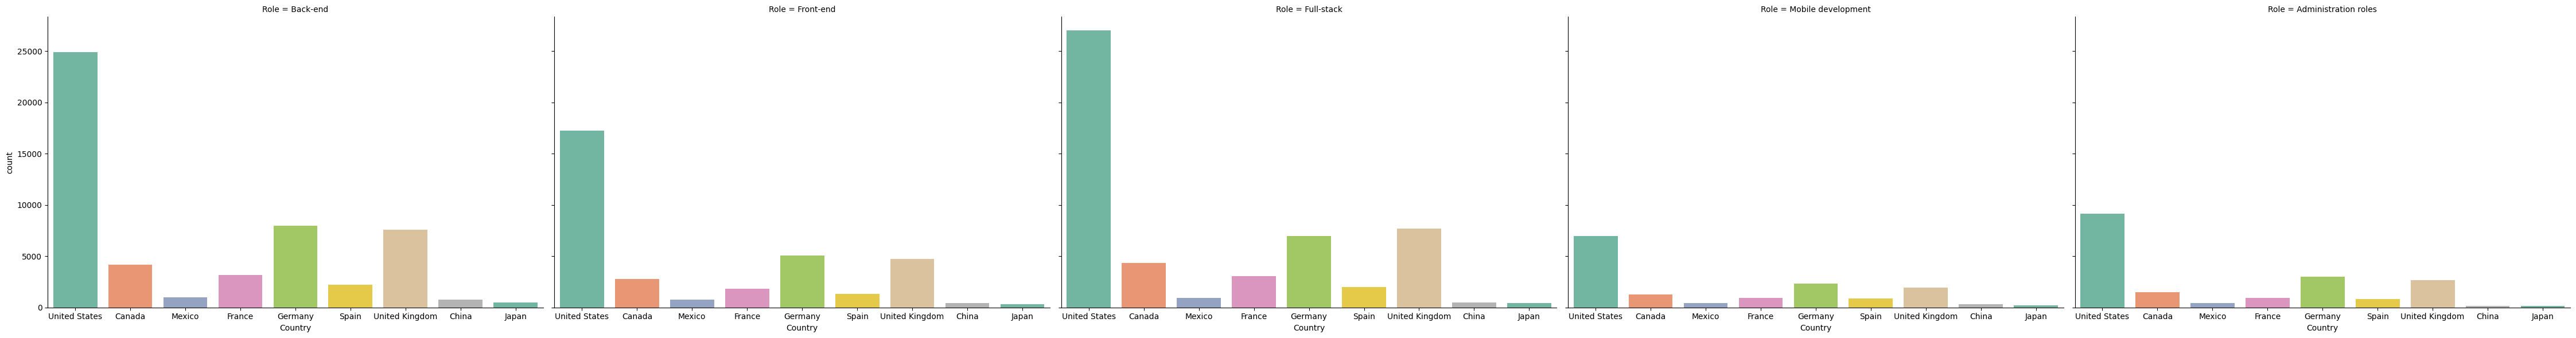

In [654]:
sns.catplot(x='Country',
            col='Role',
            data=devDf,
            kind='count',
            height=6,
            aspect=1.5,
            palette='Set2')

# Lượng data bị thiếu của các ngành học (Undergraduate) theo từng năm

In [655]:
df['UndergradMajor'] = df['UndergradMajor'].str.lower()
edudf = df[['Year', 'UndergradMajor']]

#fill in NOCB:
edudf['UndergradMajor'].bfill(axis=0, inplace=True)

print(edudf.head())

   Year                                     UndergradMajor
0  2018  data or business analyst;database administrato...
1  2020  computer science, computer engineering, or sof...
2  2018  computer science, computer engineering, or sof...
3  2019  computer science, computer engineering, or sof...
4  2020  computer science, computer engineering, or sof...


/var/folders/tb/2gs11dr53_g_1c68gymq2dg00000gn/T/ipykernel_3687/1402125462.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  edudf['UndergradMajor'].bfill(axis=0, inplace=True)
/var/folders/tb/2gs11dr53_g_1c68gymq2dg00000gn/T/ipykernel_3687/1402125462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf['UndergradMajor'].bfill(axis=0, i

In [656]:
majors = ['social science','natural science','computer science','development','another engineering','never declared']

for major in majors:
    edudf.loc[edudf['UndergradMajor'].str.contains(major, case=False, na=False), str(major)] = True

edudf = pd.melt(edudf, id_vars='Year', value_vars=majors, var_name='UndergradMajor', value_name='UndergradMajorFlag', col_level=None, ignore_index=True)
edudf.dropna(how='any', inplace=True)
print(edudf.head())

/var/folders/tb/2gs11dr53_g_1c68gymq2dg00000gn/T/ipykernel_3687/3838418368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.loc[edudf['UndergradMajor'].str.contains(major, case=False, na=False), str(major)] = True
/var/folders/tb/2gs11dr53_g_1c68gymq2dg00000gn/T/ipykernel_3687/3838418368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.loc[edudf['UndergradMajor'].str.contains(major, case=False, na=False), str(major)] = True
/var/folders/tb/2gs11dr53_g_1c68gymq2dg00000gn/T/ipykernel_3687/38

     Year  UndergradMajor UndergradMajorFlag
17   2018  social science               True
57   2019  social science               True
74   2018  social science               True
89   2018  social science               True
109  2019  social science               True


In [657]:
edudf = edudf.groupby(['Year', 'UndergradMajor']).count().reset_index()

/var/folders/tb/2gs11dr53_g_1c68gymq2dg00000gn/T/ipykernel_3687/219388157.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


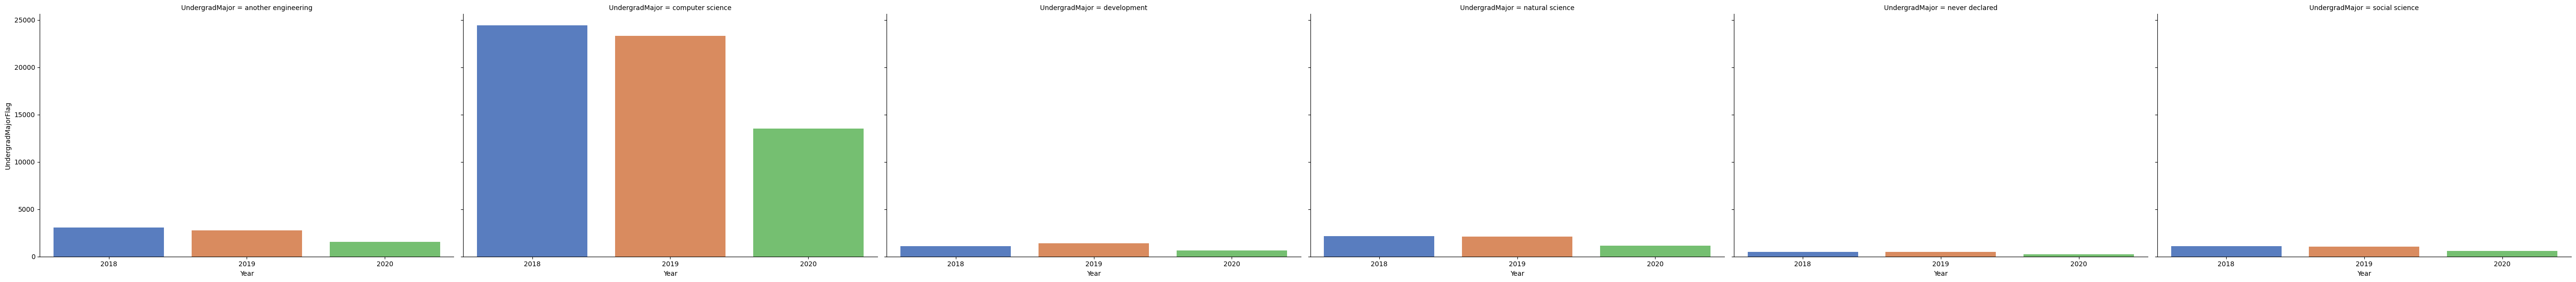

In [662]:
sns.catplot(
    data=edudf,
    kind="bar",
    x="Year",
    y="UndergradMajorFlag",
    col="UndergradMajor",
    height=6,
    aspect=1.5,
    palette="muted"
)
plt.show()

In [663]:
df['ConvertedComp'].head()

0        40.0
1    116000.0
2         NaN
3    103000.0
4     66000.0
Name: ConvertedComp, dtype: float64